# import libaries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

# read data using read_csv

In [12]:
df=pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [13]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# check datatype of each columns

In [14]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# drop the unwanted columns (Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size')

In [15]:
df=df.drop(columns=['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'])

In [16]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

# rename the column name

In [17]:
df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven Wheels':'Drive Mode','City MPG':'City MPG','Highway MPG':'Highway MPG','MSRP':'Price'},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Driven_Wheels  11914 non-null  object 
 7   highway MPG    11914 non-null  int64  
 8   city mpg       11914 non-null  int64  
 9   Price          11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


# drop duplicate record from data

In [19]:
duplicates_rows_df=df[df.duplicated()]
print("number of duplicate rows:",duplicates_rows_df.shape)


number of duplicate rows: (989, 10)


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
Transmission     10925
Driven_Wheels    10925
highway MPG      10925
city mpg         10925
Price            10925
dtype: int64

# count how many unique value in each column

In [22]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
highway MPG       0
city mpg          0
Price             0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.count( )

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
Transmission     10827
Driven_Wheels    10827
highway MPG      10827
city mpg         10827
Price            10827
dtype: int64

# IQR

In [25]:
Q1=df.quantile(0.25,numeric_only=True)
Q3=df.quantile(0.75,numeric_only=True)
IQR=Q3-Q1
print(IQR)

Year               9.0
HP               130.0
Cylinders          2.0
highway MPG        8.0
city mpg           6.0
Price          21327.5
dtype: float64


# boxplot

<Axes: xlabel='Year'>

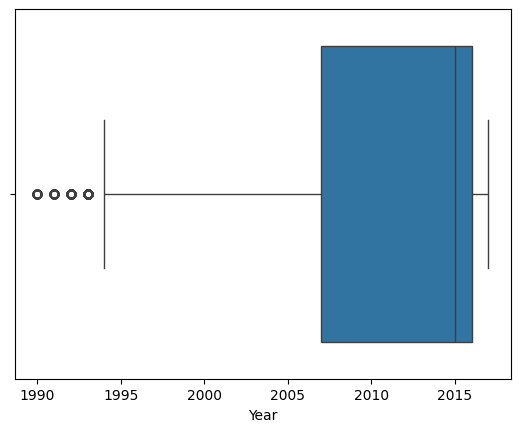

In [26]:
sns.boxplot(data=df, x='Year')
# data=df, x='Year'
# plt.show()

<Axes: xlabel='HP'>

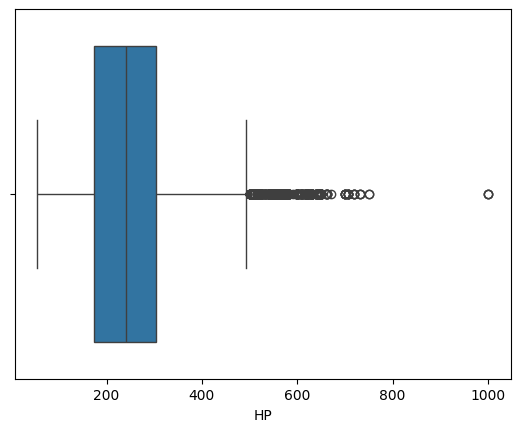

In [27]:
sns.boxplot(data=df, x='HP')
# plt.show()?

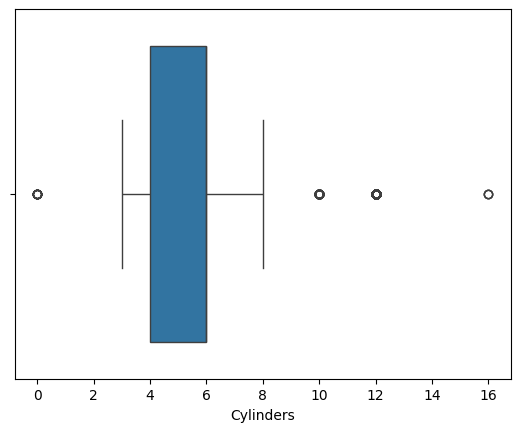

In [28]:
sns.boxplot(data=df, x='Cylinders')
plt.show()

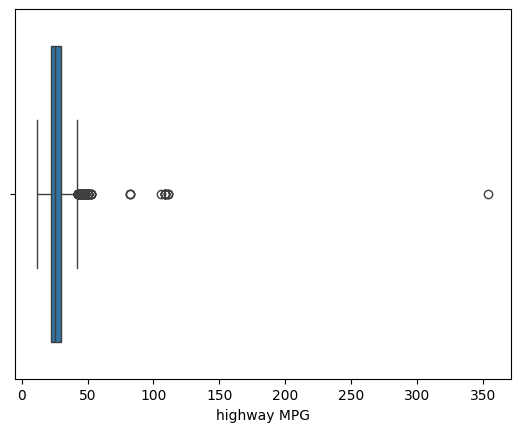

In [29]:
sns.boxplot(data=df, x='highway MPG')
plt.show()

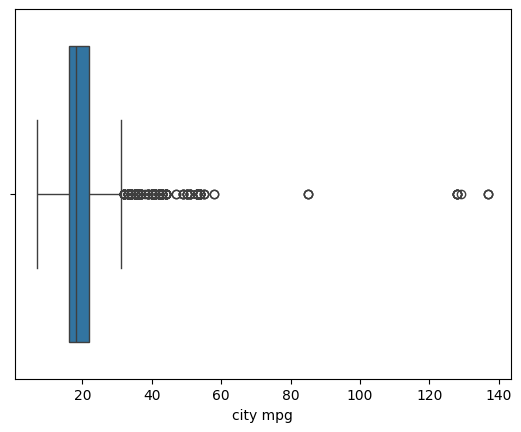

In [30]:
sns.boxplot(data=df, x='city mpg')
plt.show()

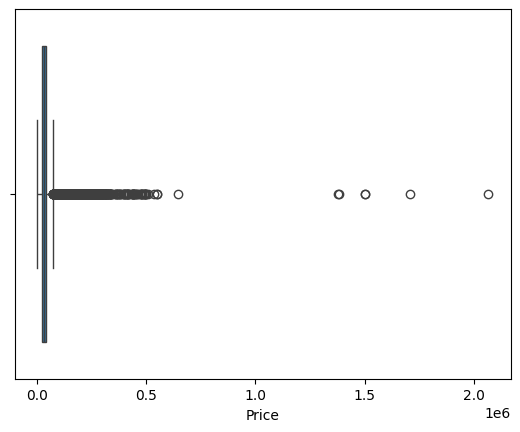

In [31]:
sns.boxplot(data=df, x='Price')
plt.show()

# Univariate analysis (where we are analyzing a single variable)

# Bivariate analysis (where we are analyzing two variables)

# Multivariate analysis (where we are analyzing more than two variables)

Text(0.5, 0, 'Make')

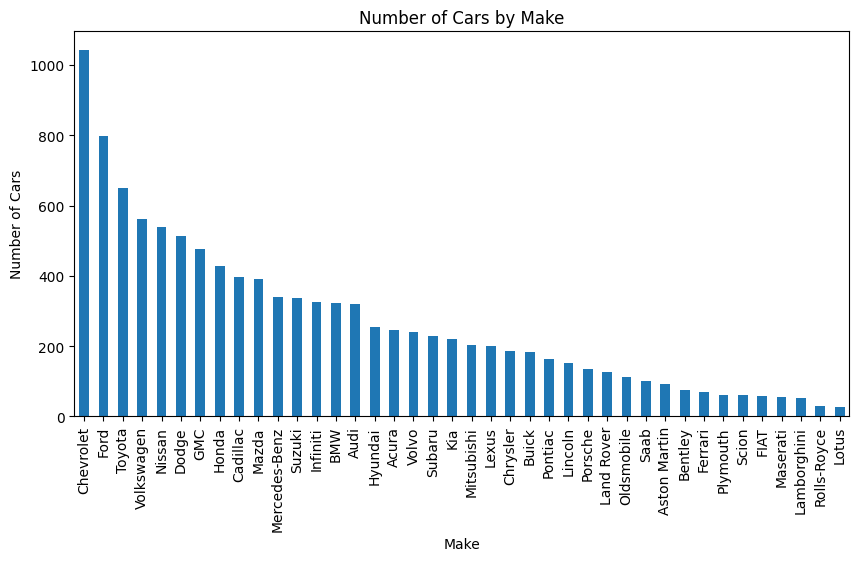

In [32]:


df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('Number of Cars by Make')
plt.ylabel('Number of Cars')
plt.xlabel('Make')

In [33]:
df.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Driven_Wheels', 'highway MPG', 'city mpg', 'Price'],
      dtype='object')

,Year,HP,Cylinders,highway MPG,city mpg,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


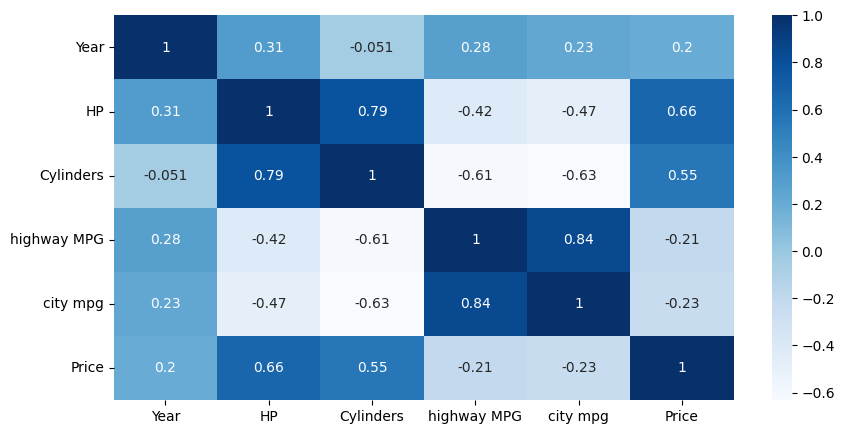

In [34]:
plt.figure(figsize=(10,5))
c=df.corr(numeric_only=True)
sns.heatmap(c,cmap='Blues',annot=True)
c

In [37]:
df['profit']=df['Year']-df['Price']

In [38]:
df['profit']

0       -44124
1       -38639
2       -34339
3       -27439
4       -32489
         ...  
11909   -44108
11910   -54658
11911   -48608
11912   -48907
11913   -26989
Name: profit, Length: 10827, dtype: int64

In [39]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,city mpg,Price,profit
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135,-44124
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650,-38639
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350,-34339
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450,-27439
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500,-32489
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120,-44108
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670,-54658
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620,-48608
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920,-48907


In [49]:
print(df.loc[['A','B'], ['Age', 'City']])

   Age      City
A   25  New York
B   30    London


In [44]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'City': ['New York', 'London', 'Paris', 'Tokyo']}
df = pd.DataFrame(data, index=['A', 'B', 'C', 'D'])

print("Original DataFrame:")
print(df)
print("\n")

# --- .loc examples ---

# Select a single row by label
print("Select row with label 'B' using .loc:")
print(df.loc['B'])
print("\n")

# Select multiple rows by labels
print("Select rows with labels 'A' and 'C' using .loc:")
print(df.loc[['A', 'C']])
print("\n")

# Select a single cell by row and column label
print("Select 'Age' of row 'C' using .loc:")
print(df.loc['C', 'Age'])
print("\n")

Original DataFrame:
      Name  Age      City
A    Alice   25  New York
B      Bob   30    London
C  Charlie   35     Paris
D    David   40     Tokyo


Select row with label 'B' using .loc:
Name       Bob
Age         30
City    London
Name: B, dtype: object


Select rows with labels 'A' and 'C' using .loc:
      Name  Age      City
A    Alice   25  New York
C  Charlie   35     Paris


Select 'Age' of row 'C' using .loc:
35


